In [ ]:
# C'est une méthode d'apprentissage dans laquelle au lieu de montrer à la machine des exemple (X, y) de ce qu'elle doit apprendre,
# on lui fournit uniquement des données X.

## On lui demande alors d'analyser la structure de ces données pour apprendre elle même à réaliser certaines tâches  

# Clustering ~ Classification non-supervisée w. K_Mean_Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

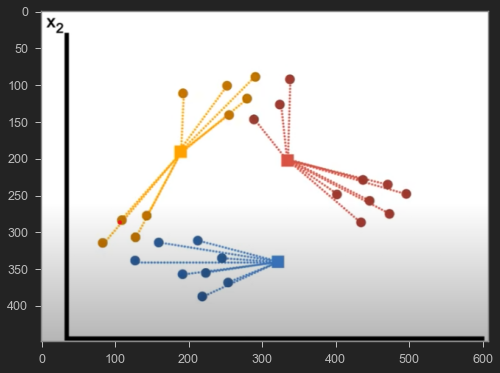

In [3]:
# Le principe est de laisser la machine apprendre à classer les données selon leur ressemblance 

# On commence par placer K 'centroïd' au hasard dans le dataset 
    # Ce sont les 'barycentres' des futurs clusters
    
## On affecte ensuite chaque point du Dataset au cluster 'centroïd' le plus proche, et on obtient ainsi K 'clusters' (ici K=3)

image = plt.imread('K_Means_Clustering.png')
plt.imshow(image)

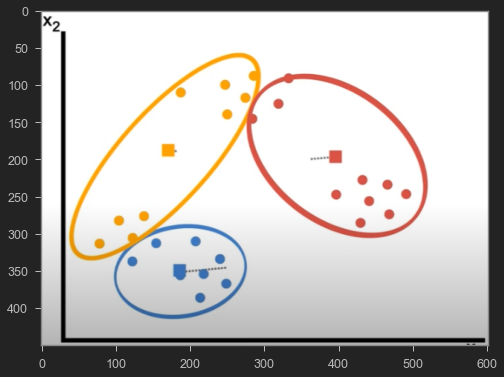

In [5]:
# Chaque 'centroïd' est ensuite déplacés au centre de son cluster 
    # Là ou se situe la moyenne des points 

image = plt.imread('K_Means_Clustering_2.png')
plt.imshow(image)

In [ ]:
# Puis on recommence jusqu'à ce que les centroïd convergent vers une position d'équilibre 

## K_Means_Clustering est donc un algorithme itératif 


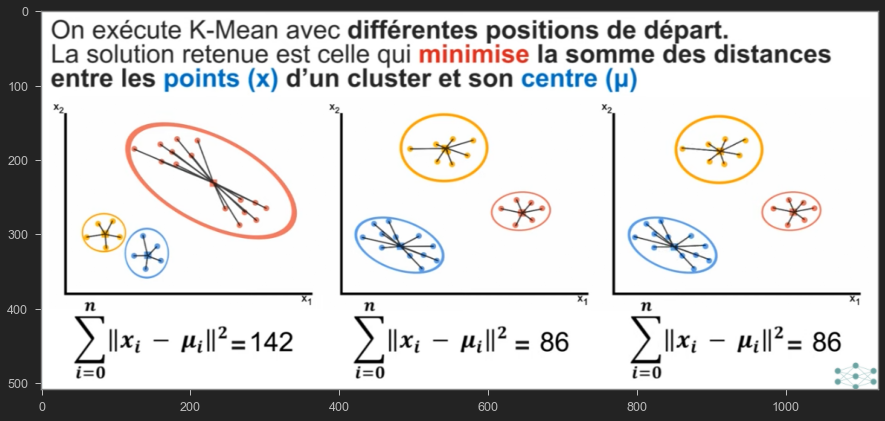

In [8]:
 # Cependant, selon la position initiale, il est possible que ces derniers convergent vers de mauvaises positions 
    
## Il existe néanmoins une solution 
    # Itérer plusieurs fois l'algorithme, et prendre celui où la somme des distances entre point et centroid est la plus faible

image = plt.imread('K_Means_Clustering_3.png')
plt.figure(figsize=(15,11))
plt.imshow(image)

In [ ]:
# En conclusion, l'agorithme K_Means_Clustering, chercher à Minimiser la Variance des cluster

## A minimiser la fonction 'Inertia'

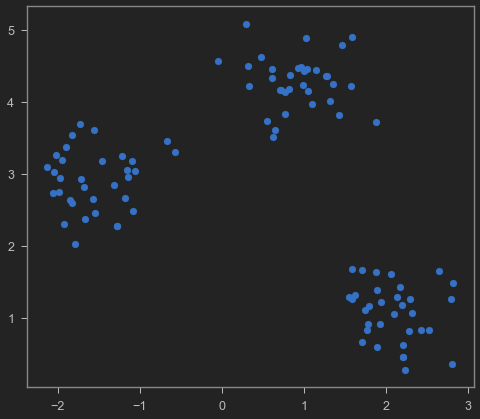

In [10]:
from sklearn.cluster import KMeans

# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

array([[ 2.08889087,  1.07930405],
       [-1.55022199,  2.90542155],
       [ 0.92702654,  4.27385438]])

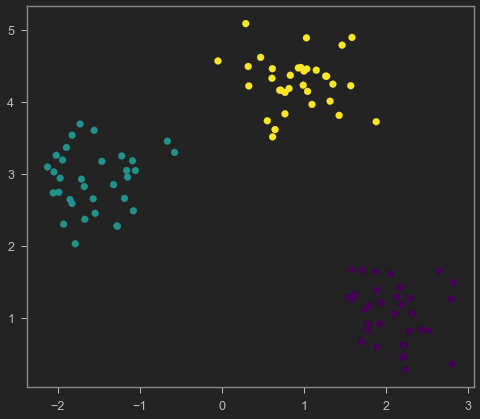

In [14]:
# On commence par créer un modèle dans lequel on spécifie des hyperparamètres 
    # 1 _ Le nombre de cluster (n_cluster=)
    # 2 _ Le nombre d'initialisation (Pas vraiment besoin d'y toucher)
    # 3 _ Le nombre d'itération maximum (Fixer de base à 300,  pas trop besoin d'y toucher non plus )
    # 4 _ Quelle stratégie d'initialisation pour notre algorithme 
        # Par défaut c'est la méthode Kmeans++ qui est choisie
            # Elle consiste à placer les centroïd sur des points très éloigné, ce qui facilite la convergence
                # C'est une très bonne méthode, donc pas trop besoin d'y toucher 
                    
# Au final, on a juste a définir notre nombre de cluster, IZI
model = KMeans(n_clusters=3)

# On utilise ensuite les méthode habituelles comme pour un transformer où de l'apprentissage supervisé 
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))


In [15]:
# On peut également afficher la position finale de nos centoïds
model.cluster_centers_

## On obitent un tableau de 2 colonnes (Car 2 variables) et 3 ligne (Car 3 centroïds)

array([[ 2.08889087,  1.07930405],
       [-1.55022199,  2.90542155],
       [ 0.92702654,  4.27385438]])

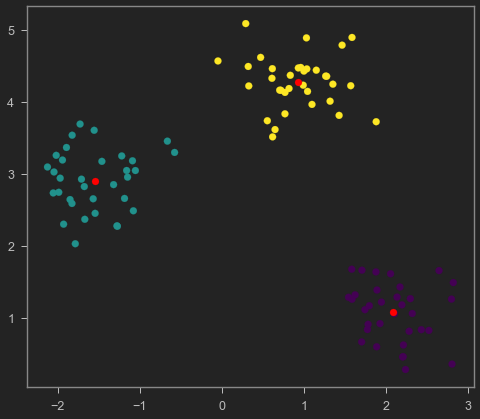

In [17]:
# On affiche le tout sur un même graphe 

plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red')

## On voit alors tous nos centroïd pour l'axe 0 et pour l'axe 1  

### C'est grâce à ces centroïds qu'on pourra faire de futures prédictions

#### Si on a une nouvelle observations qui arrivent dans nos données :
        # Pour savoir à quelle cluster il appartient on aura alors simplement à caculer sa distance avec les différentes centroïds
        # et à prendre celui pour lequel cette distance est la plus faible 

In [19]:
# Pour calculer la fonction 'coût' de notre modèle, on va utiliser la fonction Inertia, qui donne la somme des distances
# entre les points d'un cluster et le centroïd

print(model.inertia_)

# Elle est ici de "30"
    # Son intérprétation dépend de l'unité de notre dataset, des €, des cm, etc. 
    
# Rq : équivalent à la fonction .score(X)

print(model.score(X))


30.87053128014066
-30.870531280140664


In [ ]:
# Mais comment être sûr de choisir le bon nombre de cluster ? 

## Nous n'avions que 2 dimensions et 3 groupes distincs donc izi

### Mais comment faire dans le cas d'une dataset avec des centaines de dimensions

#### On va alors utilisé la technique de l'Elbow

## Elbow Method 

In [ ]:
# Consiste à tracer l'évolution du coût de notre modèle en fonction du nombre de Cluster et de détecter une "zone de coude", qui va
# nous indiquerle nombre de Cluster Optimal
    # Càd celui qui permet de réduire au maximum le coût de notre modèle tout en conservant un nombre raisonnable de Cluster

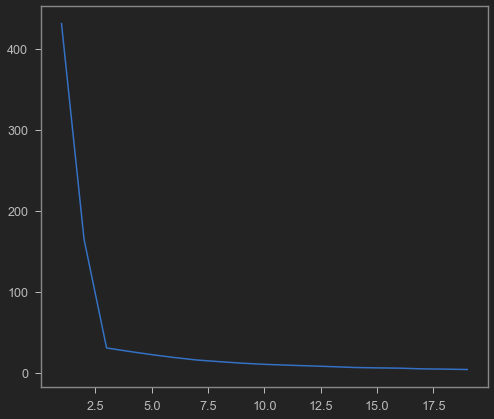

In [25]:
# 1 _ Créer une liste vide, qui contiendra les coûts de nos différents modèles pour K allant de (1 - n)
inertia = []

# 2 _ On définit la range de K que l'on veut tester 
K_range = range (1, 20)

# 3 _ On créer une boucle 'for' dans laquelle on calcule les différents coûts
for K in K_range:
    model = KMeans(n_clusters=K).fit(X)
    inertia.append(model.inertia_)
    
# 4 _ On finit par 'plot' cette liste et on obtient alors notre 'Elbow Graph'
plt.plot(K_range, inertia)


## Les autres algorithme de Clustering à Retenir 

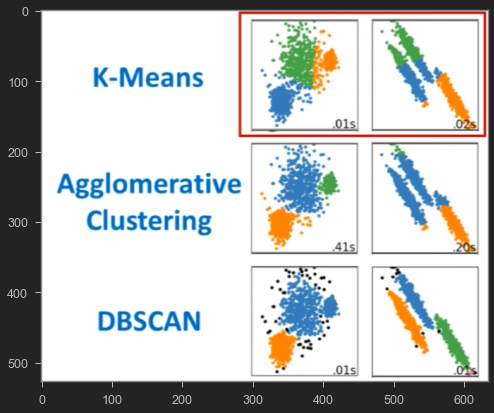

In [26]:
# DBScan et AgglomerativeClustering

## Très utile dans les situation où l'on désirerait segmenter des données qui forment des 'Clusters' non_convexes et anisotropes

### En gros, qui ressembleraient à ca : (A noter que c'est assez rare)

image = plt.imread('DBScan_Anisotrope.png')
plt.imshow(image)

# Détection d'anomalie w. Isolation_Forect

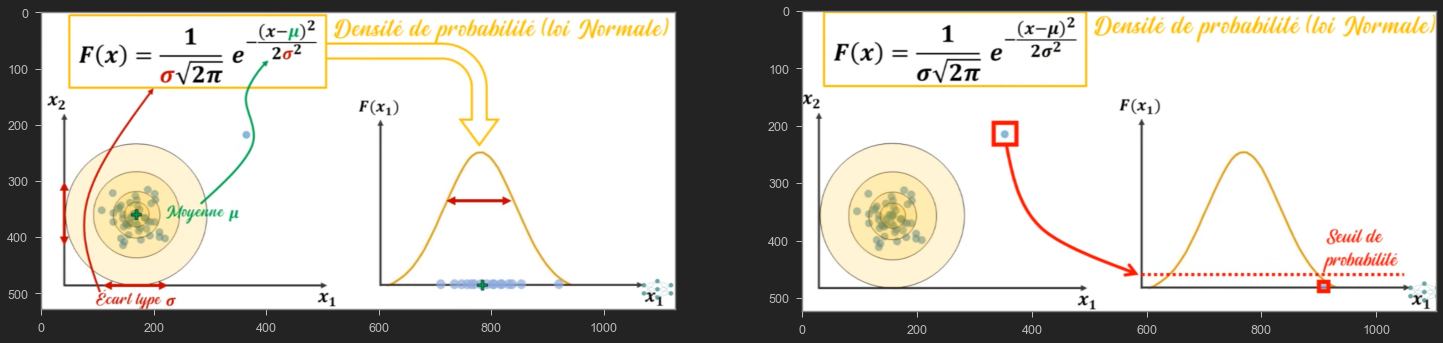

In [33]:
# La machine analyse la structure de nos données et parvient à trouver les échantillons dont les caractéristiques X sont très 
# éloignées de celles des autres échantillons 
    # Cela permet notamment de développer des systèmes de sécurité 

# Pour cela, on peut notamment calculer la moyenne et l'écart-type de nos données pour déterminer une fonction de densité de 
# de probabilité 
    # Et ensuite se servir de cette fonction pour calculer la probabiltié d'existence d'un échantillon donnée
        # Quand cette probabilité est en dessous d'un certain seuil alors l'échantillon est considéré comme anormal

image1 = plt.imread('Anomalie_&_Densité.png')
image2 = plt.imread('Anomalie_&_Densité_2.png')
plt.figure(figsize=(25,19))
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.imshow(image2)

## Cette technique fonctionne très bien, mais il existe un algo plus moderne basé dessus, Isolation Forest

## Isolation_Forest

In [ ]:
# Il s'agit d'effectuer une série de Split aléatoire, et on va compte le nombre de découpe qu'il faut effectuer pour pouvoir isoler
# nos échantillons

## Plus ce nombre est petit, plus il existe de chance qu'un échantillon soit en faite une anomalie
        
        # Failbe nombre de split = Forte Probabilité d'Anomalie

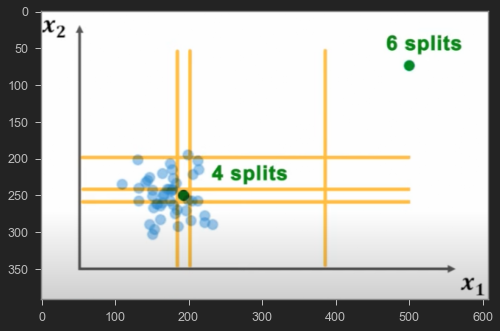

In [34]:
# Il est néanmoins possible d'isoler un échantillon qui ne soit pas une anomalie avant d'isoler l'anomalie
    # Très peu probable mais possible ! 

image = plt.imread('Isolation_Forest.png')
plt.imshow(image)

In [ ]:
# Il existe néanmoins une solution pour que la machine ne considére pas cet échantillon comme une anomalie 

## Il s'agit de demander à la machine de générer plusieurs estimateurs qui vont chacun générer une séquence de Split aléatoire

### En considérant l'ensemble de leurs résultat, on peut alors disqualifier les quelques petites erreurs qui pourraient survenir

#### C'est ce qu'on appel une technique d'Ensemble ! 

In [ ]:
# Rq : Cet algo d'Isolation_Forect génère en faite un ensemble d'arbre (d'où son nom)
    # Et les Split sont en faite les Embranchements ! 

### Application IsolationForest 

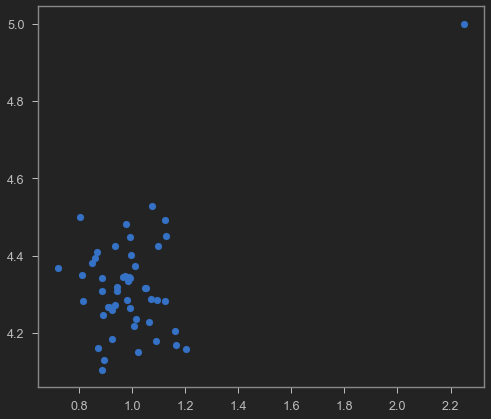

In [35]:
from sklearn.ensemble import IsolationForest

X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

In [37]:
# Pour utliser ce modèle d'Isolion_Forest, il suffit de préciser le 'Taux de Contamination'
    # Càd le Pourcentage de données que l'on désire filter
        # Ici, on dit par exemple à la machine que l'on estime qu'il existe 1% de déchet dans le dataset et qu'il faut les filtre
        
model = IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

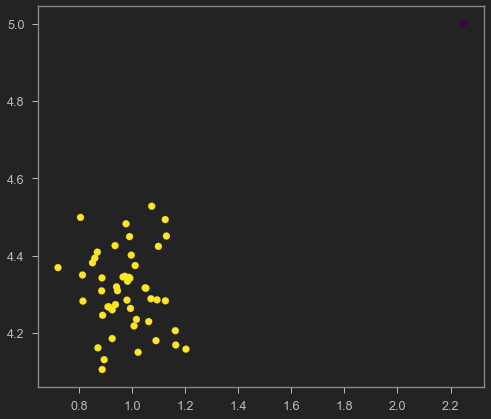

In [39]:
# Pour 'plot' le résultat (~définir notre anomalie) il suffit alors de définir ce modèle comme distinction de nos points 

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

#### Digits Outliers 

In [42]:
# Quels sont les chiffres qui sont le moins bien écrit sur la photo suivante et qu'il vaudrait donc mieux de pas considérer ??

from sklearn.datasets import load_digits



digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

X.shape
## C'est un datasets contenant 1997 images de 64 pixel

(1797, 64)

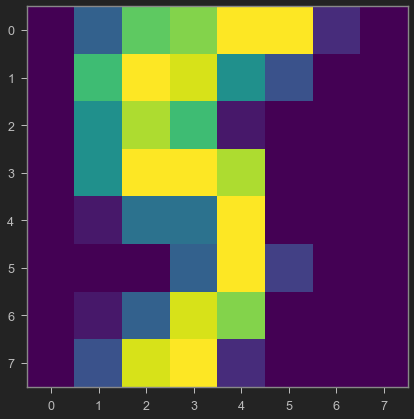

In [44]:
# Pour voir une de ces images, il suffit alors de faire : 

plt.imshow(images[15])

## Ici, c'est donc un 5

In [45]:
# On va alors tenter de nettoyer ce dataset des images qui seraient vraiment mal_écrites 
    
## On va donc chercher  à entraîner un algo d'Isolation_Forest

model = IsolationForest(contamination=0.02, random_state=0)
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [47]:
model.predict(X)

# On obtient alors un tableau avec des 1 & des -1, avec -1 pour anomalie

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
# Pour Filtrer et Afficher toussa, on va donc utiliser du boolean indexing

outlier = model.predict(X)==-1
outlier

array([False, False, False, ..., False, False, False])

In [52]:
# Mainteant que l'on a notre masque on peut l'injecter dans image 
images[outlier]

## Il ne nous reste plus que les images pour lesquels nous avons des outliers 

array([[[ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        ...,
        [ 0.,  9., 16., ...,  1.,  0.,  0.],
        [ 0.,  3.,  8., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.]],

       [[ 0.,  6., 16., ..., 15., 10.,  0.],
        [ 0.,  9., 16., ...,  6.,  5.,  0.],
        [ 0., 12., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  1.,  5., ...,  0.,  0.,  0.],
        [ 0.,  9., 16., ...,  0.,  0.,  0.]],

       [[ 0.,  4., 16., ..., 16.,  5.,  0.],
        [ 0., 11., 16., ...,  8.,  3.,  0.],
        [ 0., 10., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  4., 16., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

[[ 0.  0.  0.  0. 11. 15.  4.  0.]
 [ 0.  0.  0.  3. 16. 16. 12.  0.]
 [ 0.  0.  0.  8. 14. 16. 12.  0.]
 [ 0.  0.  0.  5. 10. 16.  6.  0.]
 [ 0.  1.  7. 11. 16. 13.  0.  0.]
 [ 0.  9. 16. 16. 14.  1.  0.  0.]
 [ 0.  3.  8. 14. 16.  9.  0.  0.]
 [ 0.  0.  0.  1. 11. 16. 12.  0.]]


Text(0.5, 1.0, '2')

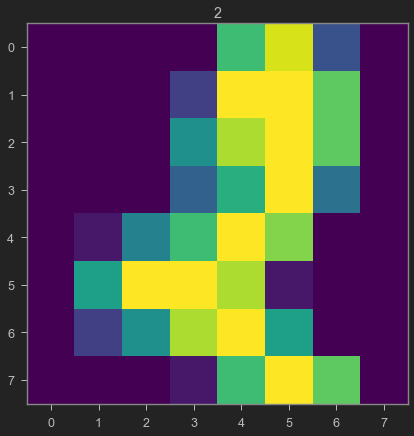

In [55]:
# On choisit la première de ces images
print(images[outlier][0])

## Que l'on plot
plt.imshow(images[outlier][0])

### Cela ressembe bien à un outliers, que l'on peut vérifier en affichant son 'titre' (/ sa clès ?)
plt.title(y[outlier][0])

#### C'était donc apparament un 2 

### Conclusion Isolation_Forest

In [ ]:
# Isolation_Forest est un des meilleurs Algo de ce type notamment car :
    # Il permet de travailler sur des datasets de TRES Grande Dimensions 
    

In [ ]:
# Il existe néanmoins d'autres Algo 

## Et notamment l'algo Local_Outlier_Factors
    # Qui repose sur la méthode des Voisins_Les_Plus_Proches 
        # Et permet de faire de la 'Novelty_Detection'
            # Càd quand on demande à la machine d'analyser nos données X non pas pour trouver des anomalie dans le Train_Set mais 
            # pour trouver des anomalies sur le Test_Set

# La réduction de dimensionalté

In [ ]:
# En analysant la structure de nos données la machine est capable d'apprendre comment simplifier cette structure tout en conservant
# les principales informations 

## D'un point de vue matématique, la machine apprend à projeter nos données dans des espaces de plus petites dimensions 

### On peut simplifier la complexité superflue d'un dataset 

#### Ce qui facilite alors beaucoup l'apprentissage de la machine 

##### On peut égalament mettre sous 2 ou 3 dimensions des datasets avec plusieurs centaines de variables 

##### Accélérer l'apprentissage de la machine en luttant contre 'le fléau de la dimension' (~risque d'overfitting 
                                                                                                  # dût au surplus de dimension)

 ##  l'Analyse en Composantes Principales ~ PCA

In [ ]:
# Le principe est de projeter nos données sur des axes appelés Composantes Principales en cherchant à minimiser la distance entre nos 
# points et leur prjection 

## De cette manière on réduit la dimension de notre dataset tout en préservant au maximum la variance de nos données
    ## C'est la le but majeur de la réduction de dimensionalité ! 
        ## Préserver un maximum de variance pour obtenir la projection qui soit la plus fidèle possible à nos données

In [ ]:
# D'un point de vue mathématique : 

## 1) On cacule la matrice de covariance de nos variables 
    ## Qui nous indique comment nos données évoluent les unes par rapport aux autres)

## 2) On calcul les vecteurs propres de notre machine 
    ## Càd les vecteurs qui facilitent l'interprétation de cette matrice 

### Faire de la Reduction de Dimensionalité, le résumé 

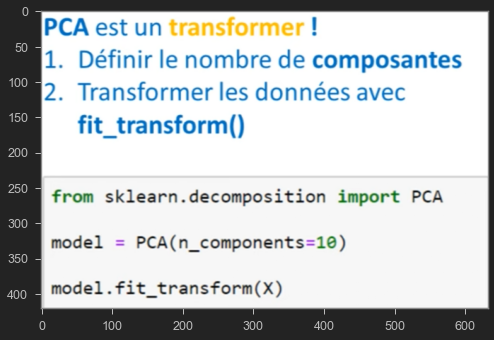

In [57]:
image = plt.imread('PCA.png')
plt.imshow(image)

In [ ]:
# La question est maintenant de savoir comment choisir le nombre de composants sur lesquelles projeter nos données

## Il y a deux cas possibles 
    
    ### 1 _ On cherche à visualiser nos données dans un espace 2D ou 3D
        ### On a alors un nombre de composant égal à 2 ou 3
        
    ### 2 _ On cherche à compresser nos données pour accélérer l'apprentissage de la machine sur des tâches de Classification ou 
    ###     bien de regression
        ### Pour ca il faut alors choisir le nombre de composantes de telle sorte à préserver entre 95% et 99% de la variance de nos
        ### donnes
            ### Il faut réduire au maximum tout en minimisant la perte de qualité de nos données 

### 1 _ La visulation de données (En 2D)

In [59]:
from sklearn.decomposition import PCA

X.shape

(1797, 64)

[[ -1.25946327  21.27488059]
 [  7.95761859 -20.76870295]
 [  6.99191605  -9.95598122]
 ...
 [ 10.80128287  -6.96025168]
 [ -4.87210949  12.42396297]
 [ -0.34439797   6.36555413]]
(1797, 2)


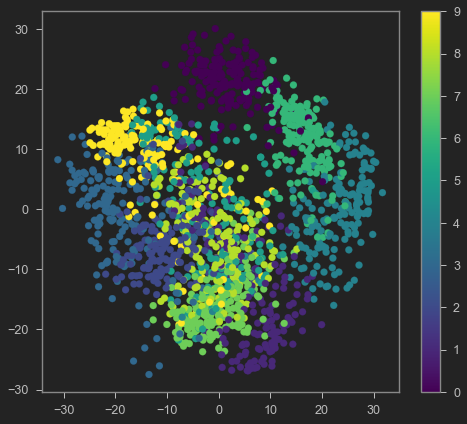

In [69]:
# On va chercher à projeter ces 64 variables dans un espace 2D, pour ensuite le visulaliser dans un graphique 

## 1 _ On créer un mdoèle PCA, avec donc deux 'components'
model = PCA(n_components=2)

## 2 _ On entraîne et utilise notre modèle pour tranformer nos données X (On rappel que PCA est un transformer)
print(model.fit_transform(X))
print(model.fit_transform(X).shape)

# On finit bien avec un tableau a DEUX dimensions, que l'on enregistre dans un variable, que l'on plot
X_reduced = model.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()

In [ ]:
# On peut alors faire plusieurs analyses sur ce graphique

## D'un cotées le 0 et le 1 sont à l'opposé. 
    ## Ce sont en effet des formes très différentes

### A l'inverse, 6,8,9 sont assez proches sur le graphe, comme leur forme 


In [71]:
# Pour savoir à quoi correspondent les axes de ce graphique, il faut analyser le contenu de chaque composante

model.components_.shape

# Ainsi, chaque composante contient 64 valeurs
    # C'est parce que chaque composantes est une combinaison linéaire des 64 variables de notre dataset 

# Cela reste cependant assez abstrait et surtout assez difficile à faire

(2, 64)

### 2) La compression de données

In [ ]:
from sklearn.decomposition import PCA

# La but est de préserver entre 95 et 99% de la variance


[1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]
[0.14890594 0.28509365 

40

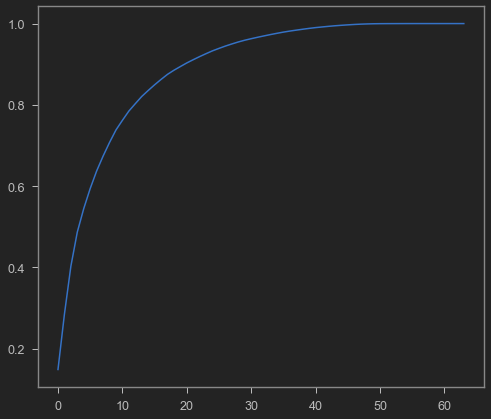

In [102]:
# 1) On commence par entraîner notre modèle sur le même nombre de dimension que l'on a dans X, ici 64
model=PCA(n_components=64)
model.fit_transform(X)

## 2)  On va ensuite examiner quelle est le pourcentage de variance préservé par chacune de nos composantes
print(model.explained_variance_ratio_)

### 3) On va faire la somme cumulée 
print(np.cumsum(model.explained_variance_ratio_))

#### 4) Il nous reste alors simplement à trouver le moment où on atteint 95% / 99%, selon le compromis entre réduction et information
        #### Ce qu'on représente par un graphique
plt.plot(np.cumsum(model.explained_variance_ratio_))

        #### Et qu'on trouve avec la fonction 'np.argmax'
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99)
        #### C'est donc à partir de la 40e composante principale que l'on atteint 99% de la variance de notre modèle

In [87]:
# Il ne reste alors plus qu'a ré_entraîner notre modèle avec cette fois_ci 40 composantes 

## Et on est sûr d'avoir réduit au maximum notre dimensionalité tout en conservant 99% de l'information 

model = PCA(n_components=40)
X_reduced = model.fit_transform(X)

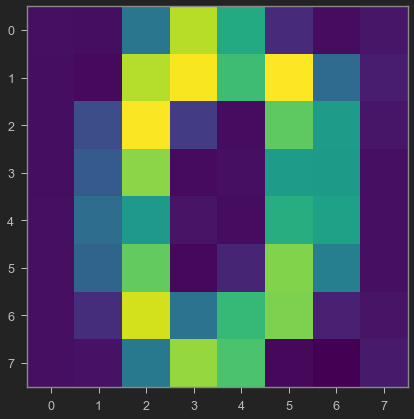

In [92]:
# Pour récuper nos image on utilise inver_transform
    # A noter que les points ne retournent pas à leur position initiale

X_recovered = model.inverse_transform(X_reduced)

# On prend ici le premier élément qu'on reshape en (8,8) car de base nous avons 64 ~ 8^2
plt.imshow(X_recovered[0].reshape((8,8)))

# La réduction de dimension à concerver beaucoup de la qualité de notre image
    # Les seuls élément qui ont perdu en qualité sont les éléments en arrières plan 

# Breaking news, mettre juste la variance souhaitée suffit

41

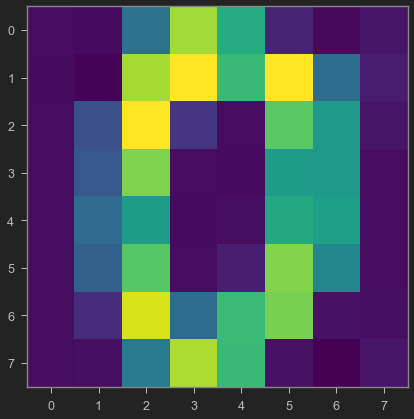

In [100]:
# Bon ba, tout ca pour en arrivé la, 
    # Je suis Flash McQueen 

model = PCA(n_components=0.99)
X_reduced = model.fit_transform(X)

X_recovered = model.inverse_transform(X_reduced)
plt.imshow(X_recovered[0].reshape((8,8)))

## Pour savoir combien de composantes sont utilisées il suffit alors de :
model.n_components_

# Remarque Globales sur l'utilisation de l'algo PCA 

## 1 _ Il faut TOUJOURS Standardiser les données (Standard_Scaler)

In [ ]:
# La raison est que les axes de l'Analyse en Composantes Principales partent tous de l'origine de nos données
    # Il est donc indispensable qu'elles soient centrées

# C'est égaement important qu'elles aient une variance égale à 1 afin de faciliter la projection de nos données sur ses axes

## 2 _ Conçu pour traiter des variables continues

In [ ]:
# Ca peut marcher avec des variables encoder OneHot mais ce n'est pas conçu pour ce genre de chose en principe 

## 3 _ Ne permet pas de projeter efficacement des données dans lesquels il y a des relation non-linéraires

In [ ]:
 # Dans ce cas on préfère utiliser des techniques dites de 'Manyfold Learning', telles que : 
    # - IsoMap
    # - T-SNE